# Проект "Исследование объявлений о продаже квартир"

В нашем распоряжении данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо установить парметры, определяющие стоимость обектов. 

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

Прочитаем файл data.csv и сохраним его в переменной data, используя разделитель колонок - параметр sep .

In [1]:
#подгружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/real_estate_data.csv', sep='\t')
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Для определения пропусков вызываем info для всего датаФрейма

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
for column in data:
    if data[column].isnull().sum() > 0:
        print(column, 
              "{:.1%}".format(data[column].isnull().sum()/len(data))) 
              

ceiling_height 38.8%
floors_total 0.4%
living_area 8.0%
is_apartment 88.3%
kitchen_area 9.6%
balcony 48.6%
locality_name 0.2%
airports_nearest 23.4%
cityCenters_nearest 23.3%
parks_around3000 23.3%
parks_nearest 65.9%
ponds_around3000 23.3%
ponds_nearest 61.6%
days_exposition 13.4%


Для более наглядного представления количества пропусков, посчитана их доля в каждом из столбцов

#### Вывод

Всего в таблице 22 столбца и 4 типа данных: bool(2), float64(14), int64(3), object(3)
Количество значений в столбцах различается. Это говорит о том, что в данных есть пропуски.
Названия столбцов указаны правильно.
    
  Проблемы, которые бросаются в глаза: пропуски во многих столбцах и типы данных, которые следует принимать за целочисленные (для ускорения обработки). 
  
  Отетим, что не все данные нам необходимы для ответа на дальнейшие вопросы, и поэтому будем обрабатывать только те столбцы, которые нам нужны для сокращения времени работы.
  
  Полученные процентные соотношения пропусков позволят оценит возможности для того, чтобы убрать строки с пропусками.

### Шаг 2. Предобработка данных

* Определим и изучим пропущенные значения:

Так как пропуски в столбце 'floors_total' составляют меньше процента (0,4%), то было решено удалить строчки с пропущенными значениями. Этот шаг не должен исказить данные, но и заполнять медианой или средним значением не имеет смысла, так как кол-ва этажей не зависит от каких-либо других параметров, преставленных в датаФрейм.

Столбцы 'ceiling_height' заполняем медианой (медина выбрана также без категорий, так как явной зависимости от какой-либо составляющей таблицы не нашлось).

Медиана в отличии от среднего менее чувствительна к выбросам, поэтому было решено заполнять медианой.

В таблице некоторые люди не указали число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0.




In [5]:
data = data.dropna(subset = ['floors_total']).reset_index(drop= True) #удаление по причине отсутствия данных по кол-ву этажей

median_height = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(median_height) #заполняем медианой 

data['balcony'] = data['balcony'].fillna(0) #не обязательный шаг, но все же


А вот для столбца с расстоянием до центра города С.-П. медиану выбираем из соображения местоположения недвижимости. Поэтому сортируем датафрейм по 'locality_name'  и применяем agg: 'median'. В цикле находим пустые значения и заполняем их медианой, соответсвующей тому или иному пункту.

In [6]:
#медиана по населенному пункту
median_table_center_nearest = data.groupby('locality_name').agg({'cityCenters_nearest': 'median'})
#для каждого пункта в таблице медиан
for local in median_table_center_nearest.index:
    median_center_nearest = median_table_center_nearest.loc[local, 'cityCenters_nearest']
    #находим значения пункта и проопущенные значения и заполняем медианой
    data.loc[data['locality_name'] == local, 'cityCenters_nearest'] =  (
        data.loc[data['locality_name'] == local, 'cityCenters_nearest'].fillna(median_center_nearest)
    )     
#data.info() убралось слишком мало пропусков , значит данных нет и медианой заполнять нецелесообразно

Вычисляем соотношение кухни к общей на заполненных данных в разбивке по комнатам. Затем с помощью полученного коэффициента получим кухню от общей. 


In [7]:
#data['rooms'].value_counts()
#заполняем 0
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['living_area'] = data['living_area'].fillna(0)


data['kitchen_part'] = data['kitchen_area'] / data['total_area']  #доля кухни в общей площади
median_kitchen_part = data.groupby('rooms')['kitchen_part'].median()   #медиана в группировке по комнатам


def kitchen_area(row):
    if row['kitchen_area'] == 0:
        row['kitchen_area'] = row['total_area'] * median_kitchen_part.loc[row['rooms']]
    return row
data = data.apply(kitchen_area, axis = 1)



Для того, чтобы не было казуса с тем что кухня+жилая площадь > общей площади, найдем нежилую площадь как разницу между общей и кухня+жиая площадь. Далее найдем медиану тоже в разбивке по комнатам и посчитаем жилую площаль в цикле, заполняю при этом только пустые значения.

In [8]:
data['not_living_part'] = data['total_area'] - data['living_area'] - data['kitchen_area'] #доля нежилой площади 
median_not_living_part = data.groupby('rooms')['not_living_part'].median()

def living_area(row):
    if row['living_area'] == 0:
        row['living_area'] = row['total_area'] - row['kitchen_area'] - median_not_living_part.loc[row['rooms']]
    return row
data = data.apply(living_area, axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 24 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null float64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            2775 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 23613 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18173 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around300

* Приведем данные к нужным типам:

Для ускорения времени обработки изменим тип некоторых столбцов на integer, используя .astype().
Для того, чтобы не возникала ошибки при переводе на целочисленный тип заполнили пропущенные значения на 0.

Понятно, что кол-во парков, прудов, дней, балконов и этажей не могут быть дробными. А стоимость недвижимости тоже меняем на целочисленный, чтобы не таскать копейки.

In [10]:
data[['parks_around3000', 'ponds_around3000', 'days_exposition']] = data[['parks_around3000', 'ponds_around3000','days_exposition']].fillna(0)
data[['last_price', 'floors_total', 'balcony', 'days_exposition', 'parks_around3000', 'ponds_around3000']] = (
    data[['last_price', 'floors_total', 'balcony', 'days_exposition', 'parks_around3000', 'ponds_around3000']]
    .astype('int'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 24 columns):
total_images            23613 non-null int64
last_price              23613 non-null int64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null int64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            2775 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 23613 non-null int64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18173 non-null float64
parks_around3000        23613 non-null int64
parks_nearest           8045 non-null float64
ponds_around3000       

#### Вывод
Проблемы с пропусками в таблице с данными могут связаны с двумя факторами: 
* первый - не вписаны пользователем (скорее всего не знали данные своих квартир), 
* второй — произошла ошибка при выгрузке данных, система дала сбой/не опознан объект на картах.

Обработав данные, устранили пропущенные в столбцах, где это необходимо и целесообразно.
Также был поменян тип данных, где был необходим целочисленный.

Взглянув на инфо, можно увидеть, как заполнились столбцы и типы для каждого. Незаполненные столбцы говорят, что там и не нужно заполнение. К примеру апартаменты. 

### Шаг 3. Посчитаем и добавим в таблицу

* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

Цена за метр находится как сумма за недвижимость деленная на общую плщадь. Для быстрой обработки переведем цену за кв.метр в целочисленный (и чтоб приятнеее было смотреть на цифры) и также переведем в формат "млн" 

In [11]:
#цена квадратного метра
data['price_for_m'] = data['last_price'] / data['total_area'].astype('int')
data['last_price_mln'] = data['last_price']/1000000 #млн

Для обработки даты публикации необходимо первести в формат времени, используя: to_datetime
Добавляем с исходному файлу с данными столбцы с днями недели, месяцами и годами с помощью DatetimeIndex.

In [12]:
#день недели, месяц и год публикации объявления;
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S')
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,kitchen_part,not_living_part,price_for_m,last_price_mln,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000,8,NaN,...,2,755.0,0,0.231481,32.000,120370.370370,13.000,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600,1,NaN,...,0,NaN,81,0.272277,10.800,83750.000000,3.350,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300,4,NaN,...,2,574.0,558,0.148214,13.400,92785.714286,5.196,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,121.525,9,NaN,...,3,234.0,424,0.000000,139.125,408176.100629,64.900,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000,13,NaN,...,1,48.0,121,0.410000,27.000,100000.000000,10.000,1,6,2018


Проведем категоризацию для столбца с этажами: первый, последний, другой
Напишем функцию, которая ищет этаж. На вход функции попадает строка, а возвращает она категорию. Применим метод apply(): он берёт значения столбца датафрейма и применяет к ним функцию из своего аргумента.

In [13]:
#этаж квартиры; варианты — первый, последний, другой;
def floors(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
    
data['floor_type'] = data.apply(floors, axis = 1)

Находим соотношение жилой и общей площади, а также отношение площади кухни к общей

In [14]:
#соотношение жилой и общей площади, а также отношение площади кухни к общей
data['rel_living_total'] = data['living_area'] / data['total_area']
data['rel_kitchen_total'] = data['kitchen_area'] / data['total_area']
data.head(3) 
#'rel_kitchen_total' & 'kitchen_part' по сути одно и то же, но 'kitchen_part' до заполнения пропусков, а значит есть нули

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_part,not_living_part,price_for_m,last_price_mln,weekday,month,year,floor_type,rel_living_total,rel_kitchen_total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,0.231481,32.0,120370.370370,13.000,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,0.272277,10.8,83750.000000,3.350,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,0.148214,13.4,92785.714286,5.196,3,8,2015,другой,0.612500,0.148214


Для удобства чтения данных все float числа будем отображать с точностью до двух знаков после запятой (а нам больше то в проекте и не надо)

In [15]:
pd.options.display.float_format = "{:,.2f}".format 
# с точностью до двух знаков после запятой (а нам больше то в проекте и не надо)

#### Вывод

после проведения расчетов в исходной таблице с данными появились столбцы с:
* ценой квадратного метра;
* днем недели, месяцем и годом публикации объявления;
* этажом квартиры — первый, последний, другой;
* соотношением жилой и общей площади, а также отношением площади кухни к общей.

### Шаг 4. Проведем исследовательский анализ данных:

#### Исследование площади, цены, числа комнат, высоты потолков

* Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

In [16]:
data_analys_max = data[['total_area', 'last_price_mln', 'rooms', 'ceiling_height']].max()
data_analys_max

total_area       900.00
last_price_mln   763.00
rooms             19.00
ceiling_height   100.00
dtype: float64

Для автоматизации процесса построения графиков, создадм словарь с интересующими для нас столбцами. Каждый столбец будет ключом, а значением будет список параметров. Тпакими параметрами будут: верхний лимит по оси Х,У кол-во корзин. 

Построим гистограмму распределения для'total_area', 'last_price_mln', 'rooms', 'ceiling_height' и боксплоты к ним.

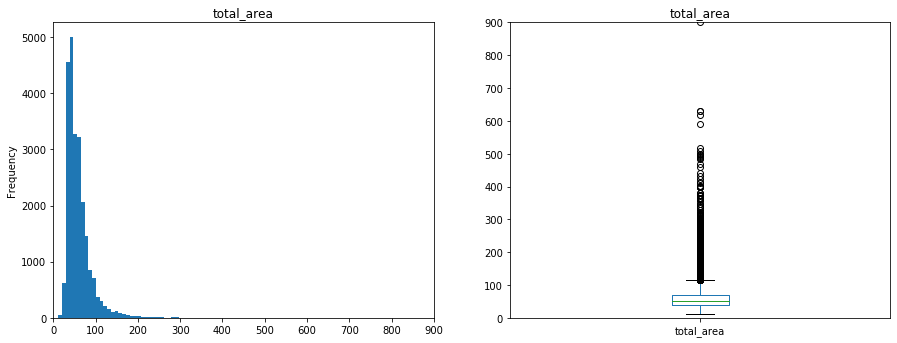

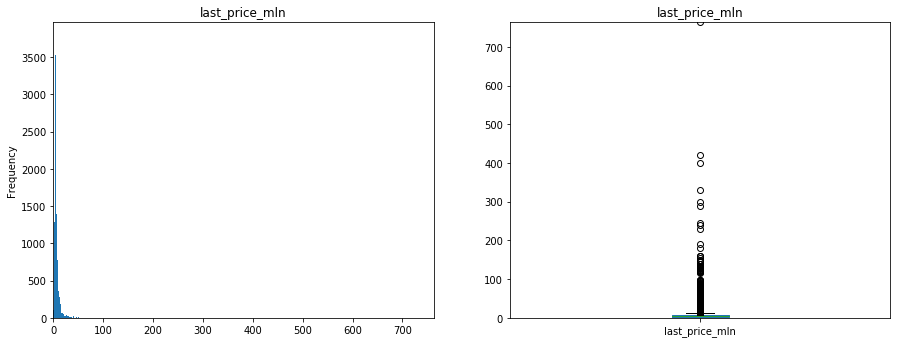

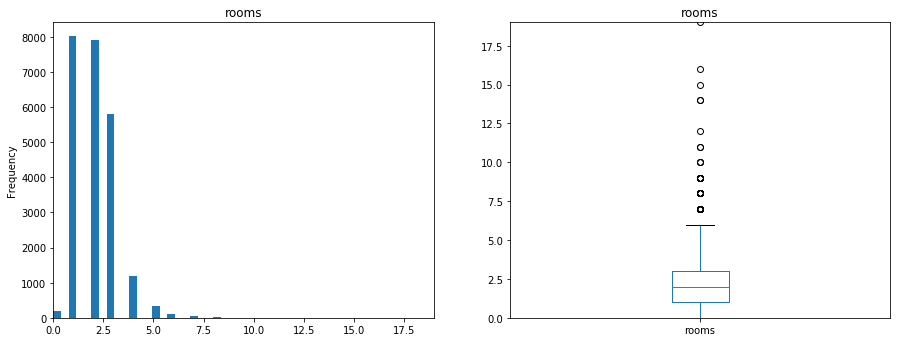

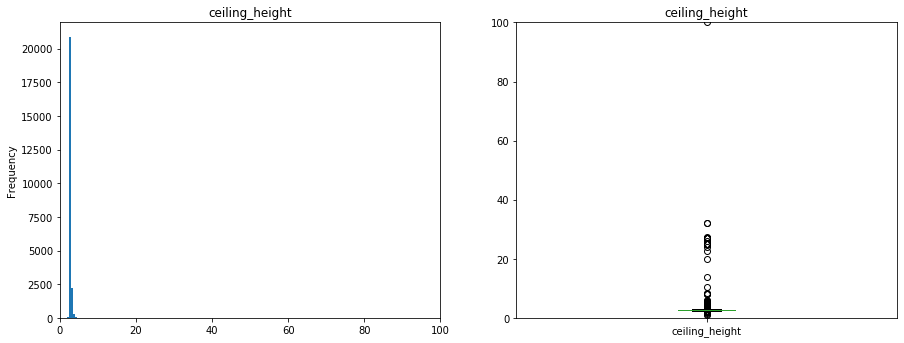

In [17]:
data_dict = {
    'total_area' : [900, 100, 900],
    'last_price_mln' : [763, 1000, 763],
    'rooms' : [19, 50, 19],
    'ceiling_height' : [100, 200, 100]
}

for column in data_dict:
    plt.subplot(4,2,1) 
    data[column].plot(kind='hist', bins=data_dict[column][1], figsize = (15,25))
    plt.xlim((0, data_dict[column][0]))
    plt.title(column)
    plt.subplot(4,2,2) 
    data[column].plot(kind = 'box', figsize = (15,25))
    plt.title(column)
    plt.ylim((0, data_dict[column][2]))
    plt.show()
    

Как видно, гистограммы не удобны в рассмотрении (при построении был взят максимальное значение для каждого параметра)ю

Нам важно знать характерный разброс — то, какие значения оказались вдали от среднего, и насколько их много. Это можно увидеть на диаграмме разброса - боксплот. На этих графиках можно увидеть медиану и квартили, а также определить усы, которые простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильным размахам. В размах «усов» попадают нормальные значения, а за пределами находятся *выбросы*, изображённые точками. 

Для получения численных значений, о которых говорили выше, используем .describe().

In [18]:
data[['total_area', 'last_price_mln', 'rooms', 'ceiling_height']].describe()

,total_area,last_price_mln,rooms,ceiling_height
count,"23,613.00","23,613.00","23,613.00","23,613.00"
mean,60.34,6.54,2.07,2.72
std,35.65,10.90,1.08,0.99
min,12.00,0.01,0.00,1.00
25%,40.00,3.40,1.00,2.60
50%,52.00,4.65,2.00,2.65
75%,69.80,6.80,3.00,2.70
max,900.00,763.00,19.00,100.00


IQR, от англ. interquartile range, «межквартильный размах».
Найдем значение усов для интересующих нас параметров.

In [19]:
quantiles = data[['total_area', 'last_price_mln', 'rooms', 'ceiling_height', 'days_exposition']].quantile([0.25, 0.75])
#quantiles 
iqr = quantiles.iloc[1] - quantiles.iloc[0]
usy = quantiles.iloc[1] + 1.5 * iqr
usy

total_area        114.50
last_price_mln     11.90
rooms               6.00
ceiling_height      2.85
days_exposition   464.50
dtype: float64

Теперь обновим соварь и добавим новые граничные значения по Х для того, чтобы графики были более наглядными, то есть сузим range.

p.s. для потолка взяла больше значение, чем ус. Все-таки потолки под 3-4 м - нормальное явление

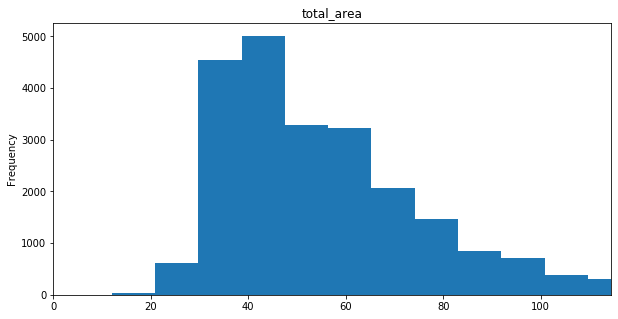

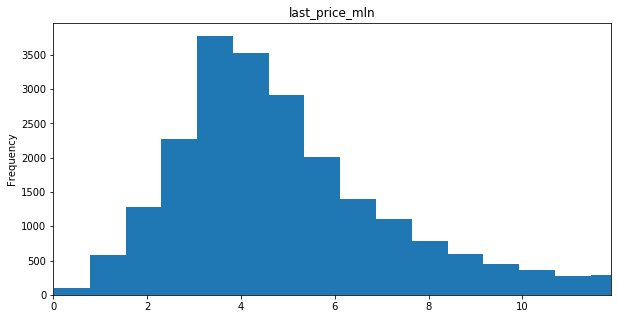

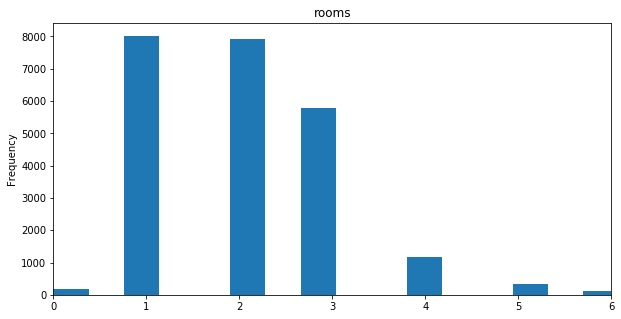

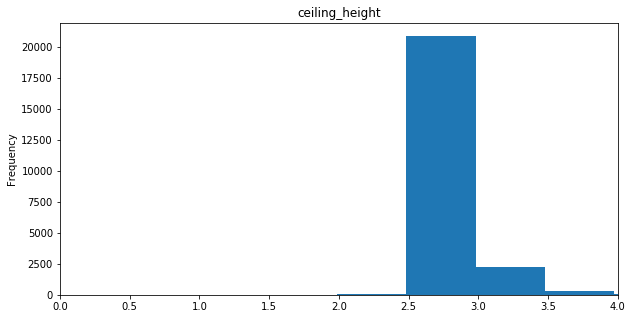

In [20]:
data_dict.update({
    'total_area' : [900, 100, 900, 114.50],
    'last_price_mln' : [763, 1000, 763, 11.90],
    'rooms' : [19, 50, 19, 6],
    'ceiling_height' : [100, 200, 100, 4]
})
for column in data_dict:     #для каждого столбца из словаря
    #строим гистограмму 
    data[column].plot(kind='hist', bins=data_dict[column][1], figsize = (10,5))
    plt.xlim((0, data_dict[column][3]))
    plt.title(column)
    plt.show()

#### Выводы

Можно заметить, что полученные графики имеют характерный вид: с одним пиком и слева и справа "хвосты" стремятся к нулю. В целом графики стремятся к нормальному распрделению, но сейчас больше похожи на распредление Пуассона.

Гистограмма показывает, как часто в наборе данных встречается то или иное значение. 

Так, чаще всего встречаются квартиры, *площадь* которых составляет *40-50 кв.м*. Реже встречаются квартиры, площадь которых меньше 20 кв.м (это скорее всего маленькие студии) или больше 100 кв.м (потому что они дорогие и их могут позволит себе не все).

40-50 кв.м это приблизительно *1-2х-комнатные* квартиры, что и доказывается на гистограмме по кол-ву комнат.

С среднем однушки в С.-П. стоят от *3 до 6 млн*, этому и соответсвует наше распределение.

Согласно гистограмме распределения высоты потолков в квартирах, наиболее часто встречаются потолки с 2,5-3 м. Оно и понятно, ведь это средняя высота потолков обычных квартир. 

#### Исследование количества времени для продажи квартиры

* Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Определим когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Для изучения времени продажи квартиры построим гистограмму и баксплот (диаграмму рассеяния).

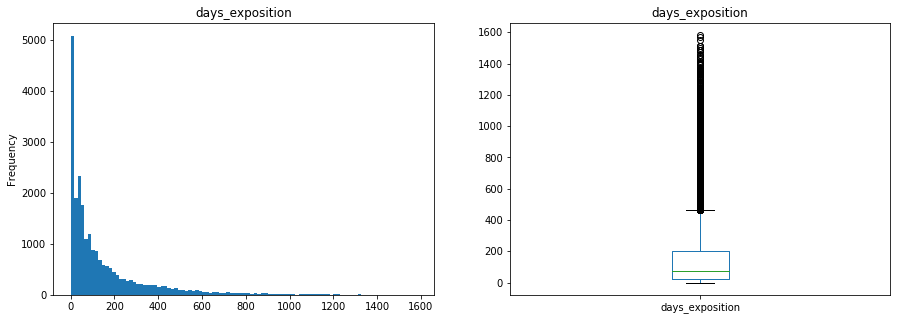

In [21]:
plt.subplot(1,2,1) #позволяет строить гистрограммы в два столбца (1 ряд, 2 столбца, 1 рисунок)
_=data['days_exposition'].plot(kind='hist', bins=100, figsize = (15,5), title='days_exposition')
#plt.xlim(10,50)
plt.subplot(1,2,2)
__=data['days_exposition'].plot(kind = 'box', figsize = (15,5), title='days_exposition')

С помощью describe() найдем значения среднего и медианы.

In [22]:
data['days_exposition'].describe()

count   23,613.00
mean       156.59
std        213.50
min          0.00
25%         22.00
50%         73.00
75%        199.00
max      1,580.00
Name: days_exposition, dtype: float64

In [23]:
#для себя
#days_exposition_data = data.query('days_exposition > @usy.days_exposition') #новая таблица, где нет выбросов по времени продажи
#per_long_exposition = len(days_exposition_data)/len(data) #процент какой составляет убранные строчки срезом
#round(per_long_exposition,3)

#### Вывод

По гистограмме срока размещения объявлений можно заметить выбросы и выбивающиеся значения. Видно два пика один на нуле, другой в районе 30 дней.

 - 1й пик с нулем связан с пустыми значениями (которые выше заменены на ноль при переводе на тип целочисленный).
 - 2й пик связан скорее всего с тем, что объявления удаляются после истечения какого-то срока (при бесплатной подписке для примера, как в авито) 

Видим,что медиана и среднее отличаются в два раза, а стандартное отклонение  (оно характеризует разброс величин, показывает, насколько значения в выборке отличаются от среднего арифметического) составляет 213. Это говорит о большом разбросе значений, поэтому медиана и средняя так сильно отличаются.
 
Продажи можно считать очень быстрыми, если срок размещения составляет неделю и меньшеб долгими - больше 465 дней (будем опираться на верхний ус). При дальнейшей обработке удалим только слишком долгие продажи, так как быстрые продажи имеют место быть.

#### Анализ редких и выбивающихся значений

* Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.

Методом query делаем срез по исходной таблице и назовем его good_data. Срез будем выполнять следующим образом:
- цена недвижимости меньше 450, основываясь на полученном боксплоте (усы удаляют слишком много квартир и стаавят границу в 11 млн);
- срок размещения объявления, основываясь на полученных усах (устранили выбросы);
- высота потолков, основываясь на средних значениях потолков;
- число комнат, основываясь на полученных усах (устранили выбросы);

Потолки выше 4 м встречаются очень редко, и это будут не среднестатистически квартиры.
ну и квартиры с более чем 6 комнатами (граница по усам) тоже очень редко встречаются, и скорее всего не входят в список жилых помещений.

In [24]:
#делаем срез
good_data = data.query('last_price_mln <= 450 and days_exposition <=@usy.days_exposition and ceiling_height <= 4 and rooms <= @usy.rooms')
#определяем интересующие столбцы
good_data_short = good_data[['last_price_mln', 'ceiling_height', 'days_exposition', 'rooms']]
#переименовываем стоблцы для сравнения
(good_data_short.set_axis(['last_price_mln_after', 'ceiling_height_after', 'days_exposition_after', 'rooms_after'],
                          axis = 'columns',inplace = True))
good_data_short.describe()
#соединяем две таблицы
good_data_full = data[['last_price_mln', 'ceiling_height', 'days_exposition', 'rooms']].join(good_data_short)
good_data_full.describe()

,last_price_mln,ceiling_height,days_exposition,rooms,last_price_mln_after,ceiling_height_after,days_exposition_after,rooms_after
count,"23,613.00","23,613.00","23,613.00","23,613.00","21,460.00","21,460.00","21,460.00","21,460.00"
mean,6.54,2.72,156.59,2.07,6.17,2.69,104.04,2.03
std,10.90,0.99,213.50,1.08,8.21,0.20,112.09,0.99
min,0.01,1.00,0.00,0.00,0.01,1.00,0.00,0.00
25%,3.40,2.60,22.00,1.00,3.40,2.60,19.00,1.00
50%,4.65,2.65,73.00,2.00,4.60,2.65,61.00,2.00
75%,6.80,2.70,199.00,3.00,6.60,2.70,154.00,3.00
max,763.00,100.00,"1,580.00",19.00,401.30,4.00,464.00,6.00


#### Вывод

Можно заметить, что медиана (50%) поменялась незначительно, а где-то и вовсе нет. Это говорит о том, что медиана не слишком чувствитльная к разбросам. А значение средней поменлось достаточно сильно. Количество строк сократилось до 19764 с 23613, то есть маленький процент строк удалилось ввиду выбросов. 

#### Исследование факторов, влияющих на стоимость квартиры 

Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

Для автоматизации процесса построения графиков создали словарь. Вызываем цикл и передаем необходимые аргументы.
Строим диаграмму рассеивания., так как четкого линейного графика не получится, ну и гистограмма не поможет. Линия регрессии поможет понять как коррелируют параметры.

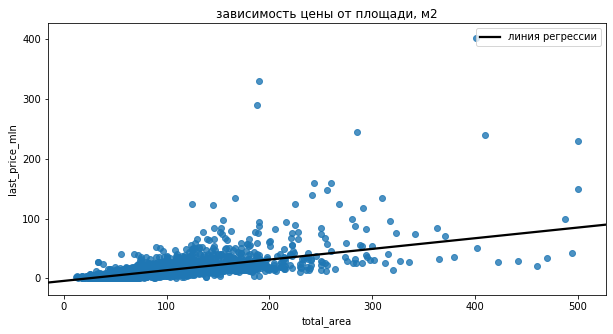

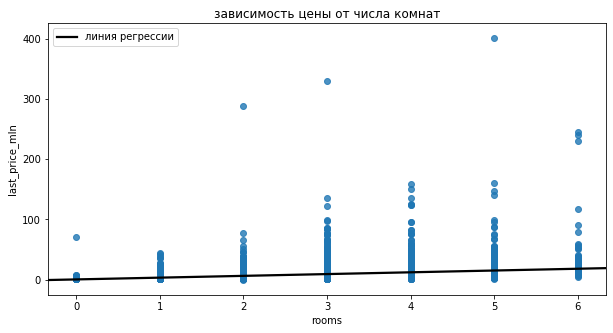

In [25]:
dict_area_room_dest = {'total_area':['площади, м2'], 'rooms':['числа комнат']}
#словарь для графиков
for columns in dict_area_room_dest:
    (good_data.plot(x=columns, y='last_price_mln',                 #хочу чтобы по оси были названия столбцов со словаря
               kind='scatter',title = 'зависимость цены от {}'.format(dict_area_room_dest[columns][0]), 
                figsize=(10,5), alpha=0.00000001))
    #линия регрессии
    (sns.regplot(x=columns, 
             y='last_price_mln', data=good_data, ci=None, line_kws={'color':'black', 'label': 'линия регрессии'}))
    plt.legend()
    plt.show()
 

Ниже прослеживается не линейная зависимость, а какая-то степенная, *но я смогла пока найти только линию регрессии как строить*

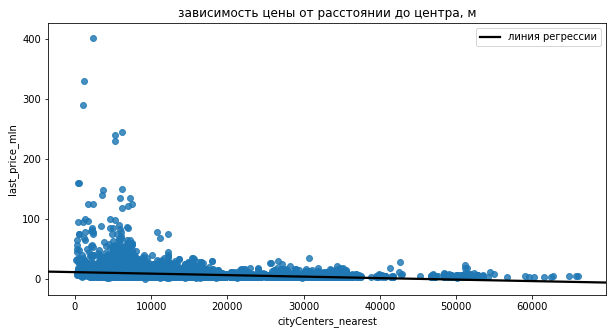

In [26]:
#удаляем нулевые значения, которые мешают оценке 
good_data_center_nearest = good_data.dropna(subset = ['cityCenters_nearest'])
(good_data_center_nearest.plot(x='cityCenters_nearest', y='last_price_mln', kind='scatter' ,
                               title = 'зависимость цены от расстоянии до центра, м', figsize=(10,5), alpha=0.1))
(sns.regplot(x='cityCenters_nearest', y='last_price_mln', 
             data=good_data_center_nearest, ci=None, line_kws={'color':'black', 'label': 'линия регрессии'}))
plt.legend()
plt.show()

#corr_price = good_data_center_nearest['cityCenters_nearest'].corr(good_data_center_nearest['last_price_mln'])
#'corr_price = {}'.format(round(corr_price,3))

Матрица рассеяния поможет понять как зависят параметры друг от друга

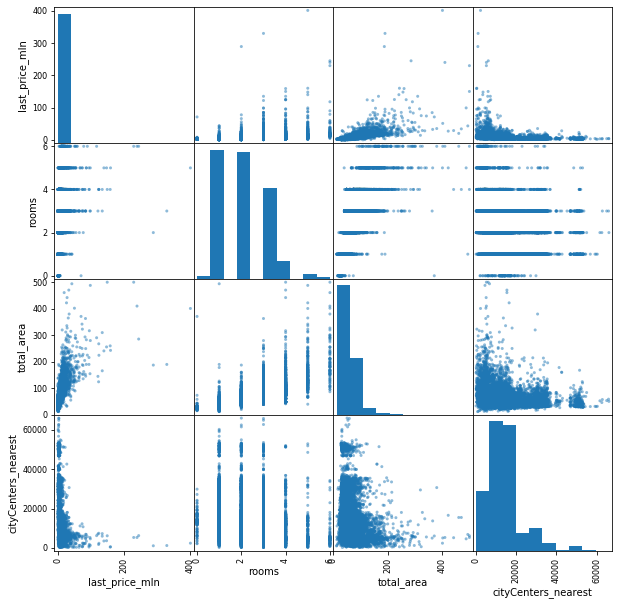

In [27]:
good_data_matrix = good_data[['last_price_mln', 'rooms', 'total_area', 'cityCenters_nearest']]
pd.plotting.scatter_matrix(good_data_matrix, figsize=(10, 10))
plt.show()

Найдем значения коэффициента корреляции, чтобы сделать выводы на сколько параметры зависимы друг от друга.

In [28]:
good_data_matrix.corr()

,last_price_mln,rooms,total_area,cityCenters_nearest
last_price_mln,1.00,0.36,0.67,-0.23
rooms,0.36,1.00,0.74,-0.16
total_area,0.67,0.74,1.00,-0.22
cityCenters_nearest,-0.23,-0.16,-0.22,1.00


Для понимания зависимости цены недвижимости от этажа, используем гистограмму. Применив сводную таблицу найдем медианные значения для каждой категории этажа

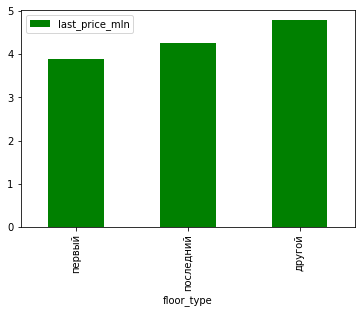

In [29]:
(good_data.pivot_table(index='floor_type', values='last_price_mln', aggfunc='median')
.sort_values(by='last_price_mln').plot(kind='bar', color='g'))
#sns.barplot(x='floor_type', y='last_price_mln', data=good_data_floor_type) 
plt.show()

В таблице данных у нас дни недели обозначены цифрами, а для понимания графиков лучше их назвать по именам. 
Тогда после сортировки и сводной таблицы присвоим значения имен дней недели. Построим график линейный изменения цены от дня недели по размщению объявления.

In [30]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']  #названия дней недели
pivot_weekday = good_data.pivot_table(index='weekday', values='last_price_mln', aggfunc = 'median')
#Присваиваем таблице новый столбец с катеориями дней недели
pivot_weekday.loc[:, 'weekday_name'] = cats  
pivot_weekday
    

,last_price_mln,weekday_name
weekday,,
0,4.60,Monday
1,4.65,Tuesday
2,4.60,Wednesday
3,4.58,Thursday
4,4.55,Friday
5,4.50,Saturday
6,4.50,Sunday


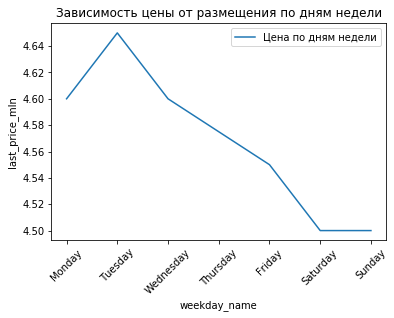

In [31]:
#plt.subplot(1,2,1) 
sns.lineplot(x='weekday_name', y='last_price_mln', data=pivot_weekday, label = 'Цена по дням недели', sort=False)
plt.title('Зависимость цены от размещения по дням недели')
plt.xticks(rotation=45)   #поворот подписей оси на 45 град
plt.legend()
plt.show()
#plt.subplot(1,2,2) 

Построим графики изменения цены на недвижимость в звисимости от размещения объявления в течение года, а также в течение всего времени, когда проводили исследование

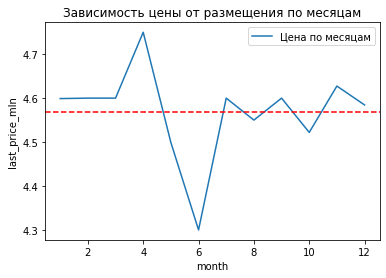

<Figure size 3240x1080 with 0 Axes>

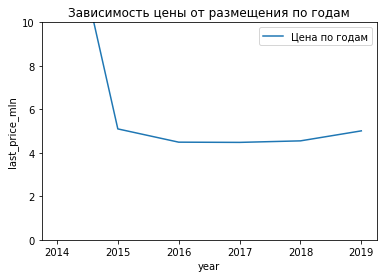

<Figure size 1800x1080 with 0 Axes>

In [32]:
pivot_month = good_data.pivot_table(index='month', values='last_price_mln', aggfunc = 'median')
pivot_year = good_data.pivot_table(index='year', values='last_price_mln', aggfunc = 'median')
#график по месяцам
sns.lineplot(x=pivot_month.index, y='last_price_mln', data=pivot_month, label = 'Цена по месяцам')
plt.title('Зависимость цены от размещения по месяцам')
plt.legend()
#plt.ylim(0, ) убрать драму
plt.axhline(pivot_month['last_price_mln'].mean(), ls='--', c='r') #линия среднего
plt.figure(figsize=(45,15))
plt.show()
#график по годам
sns.lineplot(x=pivot_year.index, y='last_price_mln', data=pivot_year, label = 'Цена по годам')
plt.ylim(0, 10)
plt.title('Зависимость цены от размещения по годам')
plt.legend()
plt.show()

plt.figure(figsize=(25,15))
plt.show()

In [33]:
pivot_year = good_data.pivot_table(index='year', values='last_price_mln', aggfunc = 'count')
pivot_year #2014значений мало

,last_price_mln
year,
2014,18
2015,459
2016,2042
2017,7645
2018,8448
2019,2848


#### Выводы

- Для стоимости недвижимости, площади и комнат корреляция положительна, а для удаленности отрицательна. Цена квартир достаточно хорошо коррелирует с площадью: чем больше площадь, тем больше цена. А вот с количеством комнат явной зависимости не наблюдается. Это может говорить, что количество комнат не сильно влияет на цену, потому что комнаты могут быть, например, маленькими, но кол-во их большое, или наоборот. Отдаленность от центра тоже имеет низкое значение коэффициента корреляции, но он для линейной зависимости. Для отдаленности от центра зависимость прослеживается степенная, то есть в центре слишком дорогие квартиры, и цена резко падает в начале при отдалении от центра, а дальше меняется незначительно.
- Поянтно, что люди не хотят покупать квартиры на первом этаже, потому что это опасно и шумно, и поэтому цена на такие квартиры ниже. на втором месте стоит квартиры на последних этажах (скорее всего связано с боязнью людей высоты или же с ситуациями поломок лифта). Ну и  самые дорогие, потому что самые удобные, это квартиры на других этажах.
- Цена на недвижимость, если размещать объявление в  начале недели самая высокая, а к концу снижается. Это может быть связано с тем, что на выходных люди отдыхают и не совершают сделки по покупке. А вот при размещение объявлений в начале недли больше вероятности, что в течение недели посмотрят его, а значит будет спрос и цена повысится.

Цена в течение года меняется следующим образом: в холодные месяца держится примерно на одном и том же уровне, а вот в летние месяцы падает. Это пора отпусков и отдыха, люди уезжают на моря, и скорее всего не просматривают объявления, что ведет к снижению спроса и цены. Также отметим, что цена квартир потихоньку растут для объявлений сделанных в последних годах. (в 2014 году на пик не обращать вниания, так как там было мало данных для исследования)

#### Анализ десяти населённых пунктов с наибольшим числом объявлений


Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

Удалим категории насленных пунктов типа 'городской поселок', 'поселок городского типа', 'коттеджный поселок' и тд. для точного учета кол-ва наименований пунктов. Используем str.replace().

In [34]:
for location in ['городской поселок', 'поселок городского типа', 'коттеджный поселок', 'село', 'поселок', 'посёлок', 'деревня']:
 #удаляем для каждой строки в названиях города
    good_data['locality_name'] = good_data['locality_name'].str.replace(location, '', regex=True)

In [35]:
#считаем кол-во объявлений и выберем наибольшее
pivot_locality_count = (good_data.groupby('locality_name')
 .agg({'price_for_m': 'count'}).sort_values(by='price_for_m', ascending=False))
#переименовываем столбец
pivot_locality_count.columns=['count']
pivot_locality_count
#считаем медиану по цене за кв.м.
pivot_locality_med = (good_data.groupby('locality_name')
.agg({'price_for_m': 'median'}))
#переименовываем столбец
pivot_locality_med.columns=['median']
#соединяем две таблицы 
pivot_locality = pivot_locality_count.join(pivot_locality_med) 
pivot_locality = pivot_locality.head(10)
pivot_locality

,count,median
locality_name,,
Санкт-Петербург,14146,"105,263.16"
Мурино,479,"86,666.67"
Шушары,413,"77,049.18"
Всеволожск,360,"65,789.47"
Пушкин,334,"100,000.00"
Колпино,317,"74,468.09"
Парголово,306,"91,858.97"
Гатчина,279,"67,924.53"
Кудрово,264,"92,664.99"


In [36]:
('Населённый пункт с самой высокой стоимостью {}'.format(pivot_locality['median'].idxmax()),
'Населённый пункт с самой низкой стоимостью {}'.format(pivot_locality['median'].idxmin()))

('Населённый пункт с самой высокой стоимостью Санкт-Петербург',
 'Населённый пункт с самой низкой стоимостью Выборг')

#### Выводы

Самое большое количество объявлений в городах, указанных выше. Но средняя стоимость цены за кв.м. не зависит от кол-ва объявлений. Так Населённый пункт с самой высокой стоимостью Санкт-Петербург' - 102,500 тыс.рб/кв.м, Населённый пункт с самой низкой стоимостью Выборг - 58,108 тыс.руб за кв.м., который сильно удален от С.П. остальные же насленные пункты находятся не совесм далеко от города.

#### Анализ изменения цены по степени удалённости от центра

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге ('locality_name').Задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

Создадим новый столбец с расстоянием в км от центра города

In [37]:
good_data['cityCenters_nearest_km'] = round(good_data['cityCenters_nearest'] /1000)
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,not_living_part,price_for_m,last_price_mln,weekday,month,year,floor_type,rel_living_total,rel_kitchen_total,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,32.00,"120,370.37",13.00,3,3,2019,другой,0.47,0.23,16.00
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,NaN,...,10.80,"83,750.00",3.35,1,12,2018,первый,0.46,0.27,19.00
3,0,64900000,159.00,2015-07-24,3,2.65,14,121.52,9,NaN,...,139.12,"408,176.10",64.90,4,7,2015,другой,0.76,0.12,7.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,27.00,"100,000.00",10.00,1,6,2018,другой,0.32,0.41,8.00
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,...,6.90,"96,333.33",2.89,0,9,2018,другой,0.47,0.30,nan


Text(0, 0.5, 'last_price_mln')

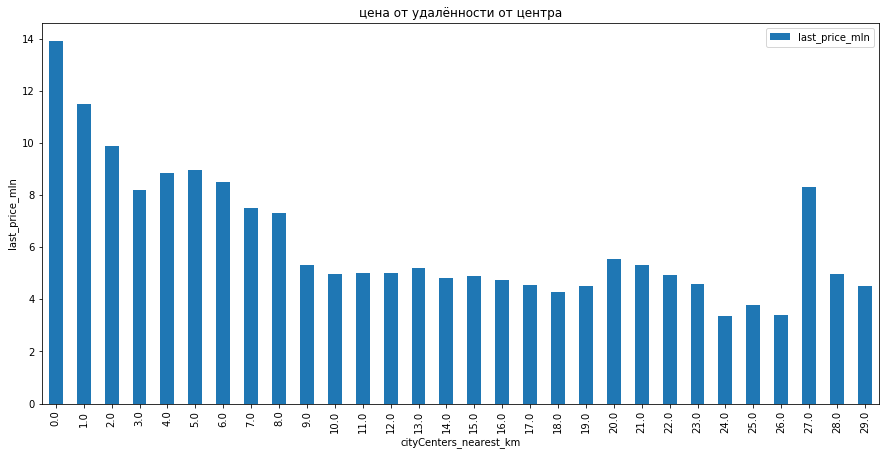

In [38]:
#выбираем срез по С.П.
SP=good_data.query('locality_name == "Санкт-Петербург"')
#группируем по расстоянию
SP.pivot_table(index='cityCenters_nearest_km', values='last_price_mln', aggfunc='median').plot(kind = 'bar', figsize = (15,7))
plt.title('цена от удалённости от центра')
plt.ylabel('last_price_mln')


#### Выводы

По графику видно, что цена резко падает в районе **от 8 до 9 км** от отчетной точки. Данный излом будет характеризовать область, входящую в центр

#### Сравнение выводов по квартирам в центре и общих выводов по всему городу

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

Выделяем таблицу с центральной частью города С.-П. по радиусу от центральной точки, который определили выше (до 9км).
Далее будем проводить сравнительную оценку центра города относително всего города.

In [39]:
SP_center = SP.query('cityCenters_nearest_km < 9') #выделим центр города


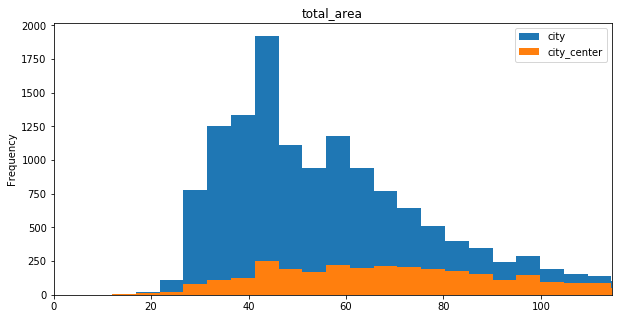

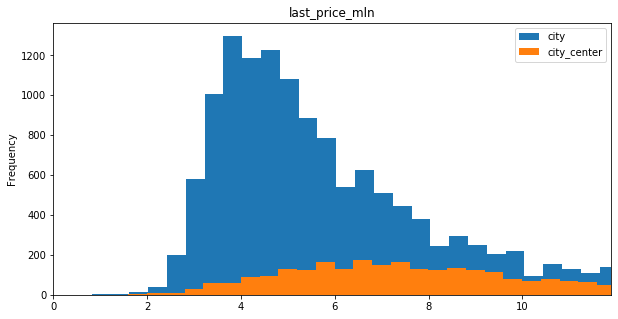

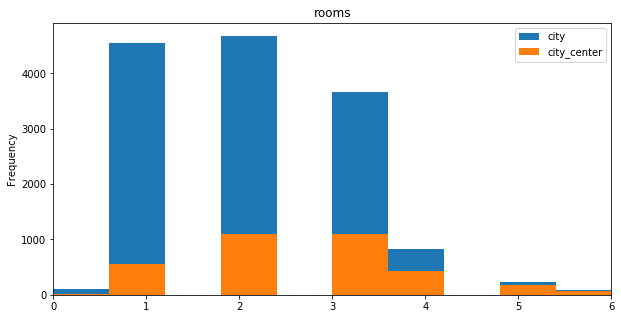

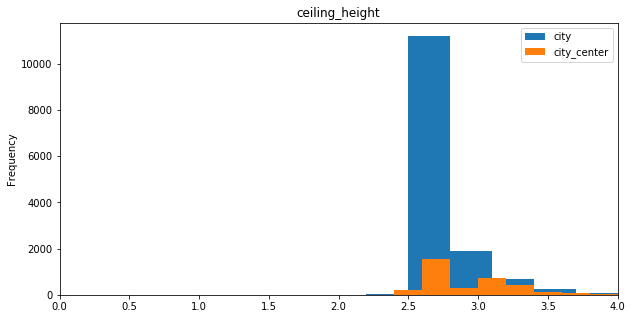

In [40]:
#изменила кол-во корзин
data_dict.update({
    'total_area' : [900, 100, 900, 114.50],
    'last_price_mln' : [763, 1000, 763, 11.90],
    'rooms' : [19, 10, 19, 6],
    'ceiling_height' : [100, 10, 100, 4]
})
for column in data_dict:     #для каждого столбца из словаря
    #строим гистограмму 
    #data[column].plot(kind='hist', bins=data_dict[column][1], figsize = (10,5), label ='all') мешает и не видно ничего
    SP[column].plot(kind='hist', bins=data_dict[column][1], figsize = (10,5), label ='city')
    SP_center[column].plot(kind='hist', bins=data_dict[column][1], figsize = (10,5),  label ='city_center')
    plt.xlim((0, data_dict[column][3]))
    plt.title(column)
    plt.legend()
    plt.show()

#### Выводы
Сравнивая центр города и весь С.-П. можно выделить следующие моменты:
- во всем городе самые распростроненные квартиры с площадью 30-50 кв.м, а в центре распределение по площади более равномерное. Связано скорее всего это с тем, что в центре старые дома, где более менее равномерно распределны и большие и маленькие квартиры. А вот в новых домах, которые строятся в нынешнее время и преимущественно в окраинах, квартиры стали более мелкими, но зато кол-во увеличилось.
- распределние площади влечет за собой похожее распреление цены, то есть более равмномерное.
- можно увидеть, что большие квартиры с 5-6 квартирами приходятся на центральную часть города, а вот за счет окраин вцелом по городу преобладают квартиры 1- и 2-хкомнатные
- потолки также входит в средние значения обычных квартир, как в центре, так и по всему городу. При этом преобладает жилье с потолками 2,5-3 м.

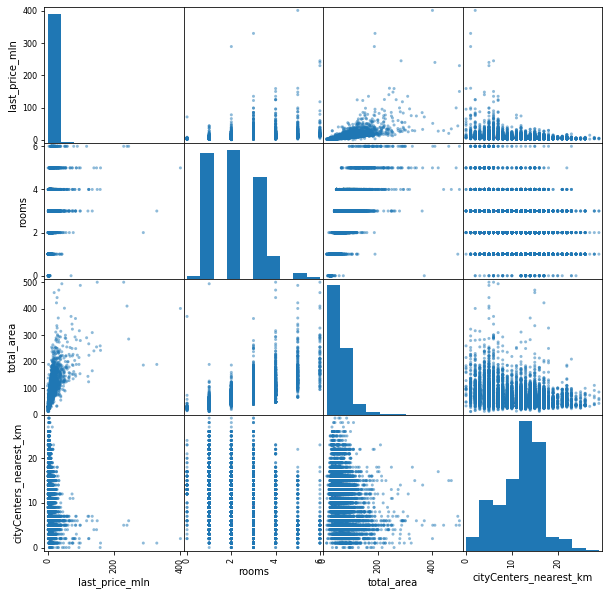

In [41]:
SP_matrix = SP[['last_price_mln', 'rooms', 'total_area', 'cityCenters_nearest_km']]
pd.plotting.scatter_matrix(SP_matrix, figsize=(10, 10))
plt.show()

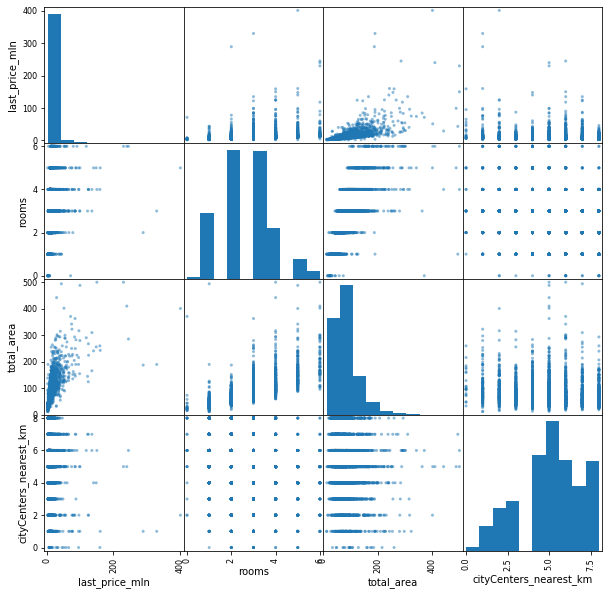

In [42]:
SP_center_matrix = SP_center[['last_price_mln', 'rooms', 'total_area', 'cityCenters_nearest_km']]
pd.plotting.scatter_matrix(SP_center_matrix, figsize=(10, 10))
plt.show()

In [43]:
SP_matrix_corr = SP_matrix.corr()
SP_center_matrix_corr = SP_center_matrix.corr()

SP_matrix_corr

,last_price_mln,rooms,total_area,cityCenters_nearest_km
last_price_mln,1.00,0.37,0.67,-0.29
rooms,0.37,1.00,0.74,-0.27
total_area,0.67,0.74,1.00,-0.33
cityCenters_nearest_km,-0.29,-0.27,-0.33,1.00


In [44]:
SP_center_matrix_corr

,last_price_mln,rooms,total_area,cityCenters_nearest_km
last_price_mln,1.00,0.32,0.65,-0.10
rooms,0.32,1.00,0.72,-0.20
total_area,0.65,0.72,1.00,-0.15
cityCenters_nearest_km,-0.10,-0.20,-0.15,1.00


Если посмотрим, как коррелируют цены на недвижимость и (кол-во комнат, площадь, удаленность от центра), то заметим одинаковые кэффициенты корреляции для центра города и всего города. Значит особого отличия в зависимости цены от различных факторов при различной расположенности жилья нет

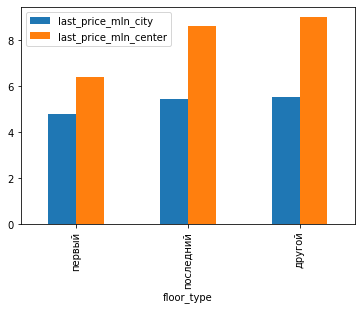

In [45]:
SP_floors = (SP.pivot_table(index='floor_type', values='last_price_mln', aggfunc='median')
.sort_values(by='last_price_mln'))
SP_floors.columns = ['last_price_mln_city']
SP_center_floors = (SP_center.pivot_table(index='floor_type', values='last_price_mln', aggfunc='median')
.sort_values(by='last_price_mln'))
SP_center_floors.columns = ['last_price_mln_center']

SP_floors = SP_floors.join(SP_center_floors)

SP_floors.plot(kind='bar', label ='city')

plt.legend()


Заметим такую же зависимость цены от этажей как и в предыдущих шагах анализа: самые дешевые цены для первых этажей, тогда как другие этажи имеют большую стоимость. 

In [46]:
pivot_SP_weekday = SP.pivot_table(index='weekday', values='last_price_mln', aggfunc = 'median')
#Присваиваем таблице новый столбец с катеориями дней недели
pivot_SP_weekday.loc[:, 'weekday_name'] = cats  

pivot_SP_center_weekday = SP_center.pivot_table(index='weekday', values='last_price_mln', aggfunc = 'median')
pivot_SP_center_weekday.loc[:, 'weekday_name'] = cats



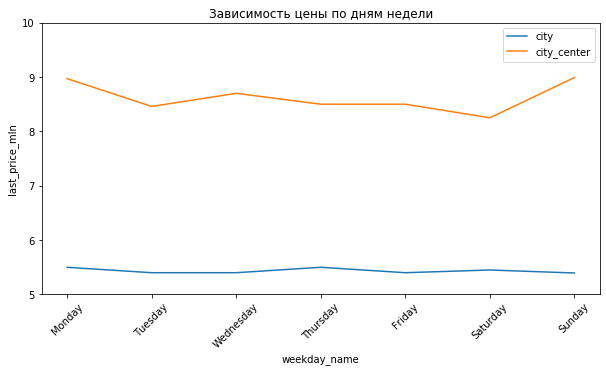

In [47]:
plt.figure(figsize=(10,5))
(sns.lineplot(x='weekday_name', y='last_price_mln', 
              data=pivot_SP_weekday, label = 'city', sort=False))
(sns.lineplot(x='weekday_name', y='last_price_mln', 
              data=pivot_SP_center_weekday, label = 'city_center', sort=False))
plt.title('Зависимость цены по дням недели')
plt.xticks(rotation=45)   #поворот подписей оси на 45 град
plt.ylim(5,10)

plt.legend()
plt.show()

Цена на недвижимость вцелом по дням недели размещения не сильно скачет, особоенно для всего города. А вот для центра есть небольшие изломы на графике, при этом повышение происходит к воскресенью -понедельнику. Быть может это связано с тем, что люди просматривают квартиры в центре больше всего в этих числах, чтоб была возможнсть приехать в течение рабочей недели и оценить квартиры.

In [48]:
pivot_SP_month = SP.pivot_table(index='month', values='last_price_mln', aggfunc = 'median')
pivot_SP_year = SP.pivot_table(index='year', values='last_price_mln', aggfunc = 'median')

pivot_SP_center_month = SP_center.pivot_table(index='month', values='last_price_mln', aggfunc = 'median')
pivot_SP_center_year = SP_center.pivot_table(index='year', values='last_price_mln', aggfunc = 'median')


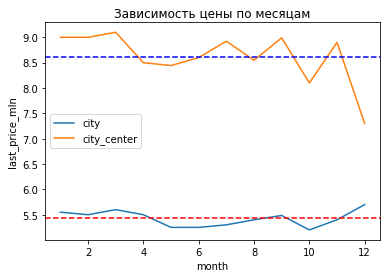

<Figure size 3240x1080 with 0 Axes>

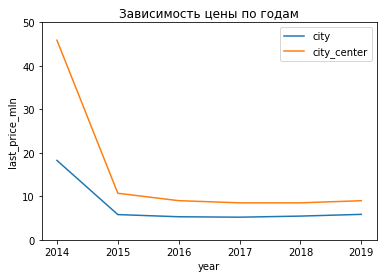

<Figure size 1800x1080 with 0 Axes>

In [49]:
#график по месяцам
sns.lineplot(x=pivot_SP_month.index, y='last_price_mln', data=pivot_SP_month, label = 'city')
sns.lineplot(x=pivot_SP_center_month .index, y='last_price_mln', data=pivot_SP_center_month, label = 'city_center')
plt.title('Зависимость цены по месяцам')
plt.legend()
#plt.ylim(0, ) убрать драму
plt.axhline(pivot_SP_month['last_price_mln'].mean(), ls='--', c='r') #линия среднего
plt.axhline(pivot_SP_center_month['last_price_mln'].mean(), ls='--', c='b')
plt.figure(figsize=(45,15))
plt.show()


#график по годам
sns.lineplot(x=pivot_SP_year.index, y='last_price_mln', data=pivot_SP_year, label = 'city')
sns.lineplot(x=pivot_SP_center_year.index, y='last_price_mln', data=pivot_SP_center_year, label = 'city_center')
plt.ylim(0, 50)
plt.title('Зависимость цены по годам')
plt.legend()
plt.show()

plt.figure(figsize=(25,15))
plt.show()

Цена на жилье в зависимости от размещения по месяцам ведет себя похожим образом как описано выше. В летний период просмотров меньше, а значит и покупок меньше, что влияет на цену. 
а вот размещение объявлений в зависимости от года почти не влияет на цену (исключаем 2014 г. мало значений) 

### Шаг 5. Общие выводы:

Итак, выполнив проект, можно сделать следующие выоды:
1. Самые распространенные квартиры 1,2 комнатные, с площадью 40-50 кв.м. и стоимотсью 4-7 млн руб. Но в центре города распредление происходит иначе, она более равномерная.
2. Самые дешевые квартиры на первых и последних этажах, тога как между идут подороже
3. Стоимость квартиры заивисит главным образом от площади, меньше от кол-ва комнат и расстояния от центра.
4. Самая дорогая цена за кв.м. в Питере, а самая дешевая - в Выборге (так. как сильно удален от города)
5. Время размещения объявлений не сильно влияют на цену, но лучш все такие размещать их в начале недели и в зимние месяцы по изученному опыту.
6. Центральной частью города С.-П. является удаленность от центра не более 9 км (цены резко падают).
7. в целом зависимость цены от различных факторов в центр города и по всему городу одинаковая, кроме как по площади, по кол-ву комнат в центре недвижимость более разнообразна.